In [20]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd
from scipy.interpolate import interp1d



def plot_subplot(dirs, position, title, color, labels, xlim, loc_legend=4):
    

    df1_ = dirs[0]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df1_['l'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df1_['reward_woD']
    df1_ = df_temp


    
    df2_ = dirs[1]
    df_temp = pd.DataFrame() 

    df_temp['l'] = df2_['l'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df2_['reward_woD']
    df2_ = df_temp


    
    df3_ = dirs[2]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df3_['l'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df3_['reward_woD']
    df3_ = df_temp
    
    if len(dirs) == 5:
        df6_ = dirs[3]
        df_temp = pd.DataFrame() 
        df_temp['l'] = df6_['l'][~((df6_['ereward'] != 0) & (df6_['reward_woD'] == 0))] 
        df_temp['f']= df_temp['l'].cumsum()/1000000
        df_temp['r']= df6_['reward_woD']
        df6_ = df_temp


        df5_ = dirs[4]
        df_temp = pd.DataFrame() 
        df_temp['l'] = df5_['l'][~((df5_['ereward'] != 0) & (df5_['reward_woD'] == 0))] 
        df_temp['f']= df_temp['l'].cumsum()/1000000
        df_temp['r']= df5_['reward_woD']
        df5_ = df_temp
    
    
    roll = 1000
    df4_ = pd.DataFrame() 
    #df4_= pd.concat([df1_, df2_, df3_])
    df4_ = df1_.merge(df3_,  how = 'outer')
    df4_ = df4_.merge(df2_,  how = 'outer') 
    if len(dirs) == 5:
        df4_ = df4_.merge(df5_,  how = 'outer') 
        df4_ = df4_.merge(df6_,  how = 'outer') 
    df4_ = df4_.sort_values(by=['f'])
    df4_ = df4_.reset_index(drop=True)
    df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
    df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
    df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
    if len(dirs) == 5:
        df4_ = df4_[(df4_['f'] > df5_['f'].iloc[0] )&(df5_['f'].iloc[-1] > df4_['f'])]
        df4_ = df4_[(df4_['f'] > df6_['f'].iloc[0] )&(df6_['f'].iloc[-1] > df4_['f'])]
   
    f1 = interp1d(df1_['f'], df1_['r'].rolling(roll, min_periods= 1).mean())
    df4_['r1'] = f1(df4_['f'].astype(float))
    f2 = interp1d(df2_['f'], df2_['r'].rolling(roll, min_periods= 1).mean())
    df4_['r2'] = f2(df4_['f'].astype(float))
    f3 = interp1d(df3_['f'], df3_['r'].rolling(roll, min_periods= 1).mean())
    df4_['r3'] = f3(df4_['f'].astype(float))
    if len(dirs) == 5:
        f4 = interp1d(df5_['f'], df5_['r'].rolling(roll, min_periods= 1).mean())
        df4_['r4'] = f4(df4_['f'].astype(float))
        f5 = interp1d(df6_['f'], df6_['r'].rolling(roll, min_periods= 1).mean())
        df4_['r5'] = f5(df4_['f'].astype(float))
        
        df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'] + df4_['r4'] + df4_['r5'])/5
    else:
        df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3
        
    df4_ = df4_.where(df4_['f']<=xlim)
    
    ax1 = plt.subplot(1, 2, position)

    roll_2 = 500
    if len(dirs) == 5:
        df4_['min'] = df4_[['r3','r2','r1','r4','r5']].min(axis=1)
        df4_['max'] = df4_[['r3','r2','r1','r5', 'r4']].max(axis=1)
    else:
        df4_['min'] = df4_[['r3','r2','r1',]].min(axis=1)
        df4_['max'] = df4_[['r3','r2','r1']].max(axis=1)
        
    ax1.fill_between(df4_['f'], df4_['max'].rolling(roll_2).mean(), df4_['min'].rolling(roll_2).mean(), color=color, alpha=0.1, interpolate=True)

    #ax1.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), color)
    if len(labels)>0:
        #ax1.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), color,label =  labels[0])
        ax1.plot(df4_['f'],df4_['r_mean'].rolling(roll_2, min_periods= 1).mean(), color, linewidth=5.0, label = labels[0] + " mean" )
    else:
        #ax1.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), color)
        ax1.plot(df4_['f'],df4_['r_mean'].rolling(roll_2, min_periods= 1).mean(), color, linewidth=5.0 )
    
    #ax1.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),color)
    
    ax1.set_xlabel('N. steps (M)', fontsize=20)
    ax1.set_ylabel('Reward', fontsize=20)
    if len(labels)>0:
        ax1.legend(loc=loc_legend, prop={'size': 19})
    
    #plt.xlim((0, xlim))
    ax1.set_title(title, y=-0.1, pad=-25, verticalalignment="top", fontsize=22)
    #ax1.set_title(title)

    ax1.grid(True)


from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd
from scipy.interpolate import interp1d



def plot_subplot_bc(dirs, position, title, color, labels, xlim, loc_legend=4):
    

    df1_ = dirs[0]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df1_['l'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df1_['reward_woD']
    df1_ = df_temp

    
    df2_ = dirs[1]
    df_temp = pd.DataFrame() 

    df_temp['l'] = df2_['l'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df2_['reward_woD']
    df2_ = df_temp


    
    df3_ = dirs[2]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df3_['l'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df3_['reward_woD']
    df3_ = df_temp
    
    if len(dirs) == 5:
        df4_ = dirs[3]
        df_temp = pd.DataFrame() 
        df_temp['l'] = df4_['l'][~((df4_['ereward'] != 0) & (df4_['reward_woD'] == 0))] 
        df_temp['f']= df_temp['l'].cumsum()/1000000
        df_temp['r']= df4_['reward_woD']
        df4_ = df_temp


        df5_ = dirs[4]
        df_temp = pd.DataFrame() 
        df_temp['l'] = df5_['l'][~((df5_['ereward'] != 0) & (df5_['reward_woD'] == 0))] 
        df_temp['f']= df_temp['l'].cumsum()/1000000
        df_temp['r']= df5_['reward_woD']
        df5_ = df_temp
    
    
    
    data= pd.DataFrame() 
    
    data['f'] = np.linspace(0, 60, num=1000)
        
    data['BC_1'] = df1_['r'].sum()/df1_['l'].count()
    print(data['BC_1'][10], "BC performance")
    
    data['BC_2'] = df2_['r'].sum()/df2_['l'].count()
    print(data['BC_2'][10], "BC performance")
    
    data['BC_3'] = df3_['r'].sum()/df3_['l'].count()
    print(data['BC_3'][10], "BC performance")
    
    data['BC_4'] = df4_['r'].sum()/df4_['l'].count()
    print(data['BC_4'][10], "BC performance")
    
    data['BC_5'] = df5_['r'].sum()/df5_['l'].count()
    print(data['BC_5'][10], "BC performance")


    
        
    data['BC_mean'] = (data['BC_1'] + data['BC_2'] + data['BC_3'] + data['BC_4'] + data['BC_5'])/5
        
    data = data.where(data['f']<=xlim)
    
    ax1 = plt.subplot(1, 2, position)

    if len(labels)>0:

        ax1.plot(data['f'],data['BC_mean'].rolling(10, min_periods= 1).mean(), color, linewidth=5.0, label = labels[0] )
    else:

        ax1.plot(data['f'],data_['BC_mean'].rolling(10, min_periods= 1).mean(), color, linewidth=5.0 )
    

    
    ax1.set_xlabel('N. steps (M)', fontsize=20)
    ax1.set_ylabel('Reward', fontsize=20)
    if len(labels)>0:
        ax1.legend(loc=loc_legend, prop={'size': 19})
    
    #plt.xlim((0, xlim))
    ax1.set_title(title, y=-0.1, pad=-25, verticalalignment="top", fontsize=22)
    #ax1.set_title(title)

    ax1.grid(True)



In [13]:
# ------------------------------- LUNAR LANDER ------------------------------------------ 

# ppobc buffer 50  rho 0.1
dirs = ['/workspace8/gabriele/RUNS/exp_lunar_ppobc_7',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppobc_8',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppobc_5',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppobc_6',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppobc_81'
       ]

dfs1 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs1.append(load_results(d))
    
         
# ppobc buffer 0 rho 0.1         
dirs = ['/workspace8/gabriele/RUNS/exp_lunar_ppobc_9',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppobc_10',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppobc_11',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppobc_12',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppobc_13']    
    
dfs2 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs2.append(load_results(d))

# vanilla ppo
dirs = ['/workspace8/gabriele/RUNS/exp_lunar_ppod_105',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppod_106',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppod_107',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppod_108',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppod_109']    
    
dfs3 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs3.append(load_results(d))

# ppo+d rho 0.1
dirs = ['/workspace8/gabriele/RUNS/exp_lunar_ppod_99',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppod_100',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppod_101',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppod_102',\
        '/workspace8/gabriele/RUNS/exp_lunar_ppod_103']    
    
dfs4 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs4.append(load_results(d))
    
# ------------------------------- REACHER ------------------------------------------    

# ppo+d rho 0.3
dirs = ['/workspace8/gabriele/RUNS/exp_reacher_ppod_51',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppod_52',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppod_53',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppod_54',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppod_55']    
    
dfs5 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs5.append(load_results(d))
    

# vanilla ppo
dirs = ['/workspace8/gabriele/RUNS/exp_reacher_ppod_42',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppod_44',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppod_45',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppod_46',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppod_47']    
    
dfs6 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs6.append(load_results(d))

    
    
# ppobc buffer 0 rho 0.3
dirs = ['/workspace8/gabriele/RUNS/exp_reacher_ppobc_15',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppobc_16',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppobc_17',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppobc_3',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppobc_4']    
    
dfs7 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs7.append(load_results(d))
        

        

# ppobc buffer 50 rho 0.3
dirs = ['/workspace8/gabriele/RUNS/exp_reacher_ppobc_2',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppobc_11',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppobc_12',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppobc_13',\
        '/workspace8/gabriele/RUNS/exp_reacher_ppobc_14']    
    
dfs8 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs8.append(load_results(d))

dirs = ['/workspace8/gabriele/RUNS/exp_reacher_bc_3_test',\
        '/workspace8/gabriele/RUNS/exp_reacher_bc_4_test',\
        '/workspace8/gabriele/RUNS/exp_reacher_bc_5_test',\
        '/workspace8/gabriele/RUNS/exp_reacher_bc_6_test',\
        '/workspace8/gabriele/RUNS/exp_reacher_bc_7_test'
       ]

df_bc1 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    df_bc1.append(load_results(d))
    

dirs = ['/shared/sebastian/BC_results/ll_bc_1_test_20mio',\
        '/shared/sebastian/BC_results/ll_bc_2_test_20mio',\
        '/shared/sebastian/BC_results/ll_bc_3_test_20mio',\
        '/shared/sebastian/BC_results/ll_bc_4_test_20mio',\
        '/shared/sebastian/BC_results/ll_bc_5_test_20mio'
       ]

df_bc2 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    df_bc2.append(load_results(d))

0.012361343406963108 BC performance
0.011815003444701277 BC performance
0.011371423399661249 BC performance
0.01269820723577762 BC performance
0.011065331016122839 BC performance


/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


0.36603356622868527 BC performance
0.5158204742157008 BC performance
0.48059261949932097 BC performance
0.5623718258305047 BC performance
0.5246768896247709 BC performance


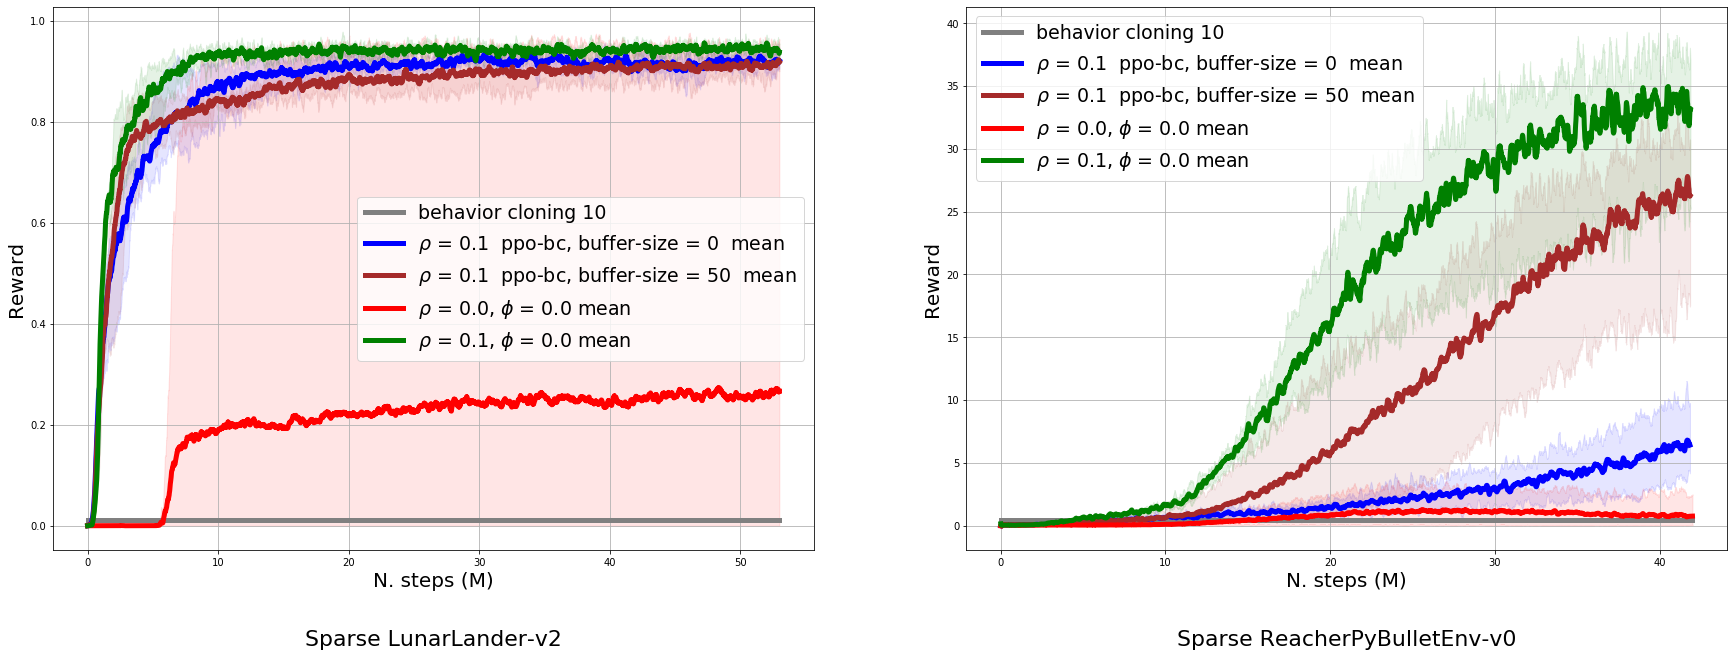

In [22]:
# GET RID OF STUPID CUT AT THE END
fig = plt.figure(clear=True, figsize=(30,10))
plot_subplot_bc(df_bc2, 1, '', 'gray', [r'behavior cloning 10 '],53, loc_legend= 7)
plot_subplot(dfs2, 1, '', 'blue', [r'$\rho$ = 0.1  ppo-bc, buffer-size = 0 '],53, loc_legend= 7)
plot_subplot(dfs1, 1, '', 'brown', [r'$\rho$ = 0.1  ppo-bc, buffer-size = 50 '], 53, loc_legend= 7)
plot_subplot(dfs3, 1, '', 'red', [r'$\rho$ = 0.0, $\phi$ = 0.0'], 53, loc_legend= 7)
plot_subplot(dfs4, 1, 'Sparse LunarLander-v2', 'green', [r'$\rho$ = 0.1, $\phi$ = 0.0'], 53, loc_legend= 7)

plot_subplot_bc(df_bc1, 2, '', 'gray', [r'behavior cloning 10'],42)
plot_subplot(dfs7, 2, '', 'blue', [r'$\rho$ = 0.1  ppo-bc, buffer-size = 0 '],42, loc_legend=2)
plot_subplot(dfs8, 2, '', 'brown', [r'$\rho$ = 0.1  ppo-bc, buffer-size = 50 '], 42, loc_legend=2)
plot_subplot(dfs6, 2, '', 'red', [r'$\rho$ = 0.0, $\phi$ = 0.0'], 42, loc_legend=2)
plot_subplot(dfs5, 2, 'Sparse ReacherPyBulletEnv-v0', 'green', [r'$\rho$ = 0.1, $\phi$ = 0.0'], 42, loc_legend=2)